# <a id='toc1_'></a>[Data Modeling](#toc0_)

Name  
Topic  
email  
June 4th, 2023  


**Table of contents**<a id='toc0_'></a>    
- [Data Modeling](#toc1_)    
- [Setup](#toc2_)    
- [Model Search](#toc3_)    
  - [Models: Hypothesis Formation and Assumptions](#toc3_1_)    
  - [Model Search: Grid Initiation](#toc3_2_)    
  - [Model Search: Fit HalfGrid](#toc3_3_)    
  - [Model Search: Performance, Efficiency, and Residual Evaluation of all Models](#toc3_4_)    
      - [**Performace Evaluation of All Models**](#toc3_4_1_1_)    
      - [**Performace Evaluation of Best Model**](#toc3_4_1_2_)    
      - [**Compute Efficiency and Runtime**](#toc3_4_1_3_)    
      - [**Residual Evaluation of Best Model**](#toc3_4_1_4_)    
  - [Final Model Tuning](#toc3_5_)    
    - [Final Model Hyperparameter Tuning](#toc3_5_1_)    
  - [Final Model Tuning: Evaluation of Hyperparameters](#toc3_6_)    
      - [**Performace Evaluation of All Hyperparameters**](#toc3_6_1_1_)    
      - [**Compute Efficiency and Runtime**](#toc3_6_1_2_)    
      - [**Performace Evaluation of Best Hyperparameters**](#toc3_6_1_3_)    
      - [**Residual Evaluation of Best Hyperparameters**](#toc3_6_1_4_)    
- [Key Findings](#toc4_)    
- [Recommendations](#toc5_)    
    - [Reference for other parameter grids](#toc5_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Setup](#toc0_)

In [22]:
# Import all functions and classes from the module named 'my_code'
from custom_functions_and_libraries import *

# Set the random.seed(42)
np.random.seed(42)
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['OMP_NUM_THREADS']='2'

# # import warnings
# warnings.filterwarnings('ignore')


# <a id='toc3_'></a>[Model Search](#toc0_)

In this section, we will apply some machine learning models on the data.


## <a id='toc3_1_'></a>[Models: Hypothesis Formation and Assumptions](#toc0_)



## <a id='toc3_2_'></a>[Model Search: Grid Initiation](#toc0_)



Here I created my X train and X test sets and y train and y test sets. 

Practice Classification Models:

In [23]:
classification = False
regression = False
clustering = True

if [classification, regression, clustering].count(True) > 1:
    raise ValueError("More than one of the classification, regression, and clustering flags are set to True. Please set only one to True.")

if [classification, regression, clustering].count(True) < 1:
    raise ValueError("None of the classification, regression, and clustering flags are set to True. Please set one to True.")

In [24]:


if classification:
    # Import the function to load the digits dataset from sklearn.datasets
    from sklearn.datasets import load_digits

    # Load the digits dataset into a variable called digits
    digits = load_digits()

    # Convert the digits dataset into a pandas DataFrame. The data is contained in digits.data and the column names in digits.feature_names
    df = pd.DataFrame(data=digits.data, columns=digits.feature_names)

    # Add a new column to the DataFrame for the target variable. The target values are contained in digits.target
    df['target'] = digits.target

    # Split the digits dataset into a training set and a testing set
    # The testing set is 30% of the total dataset, and the split is deterministic (i.e., always the same) because we set a random_state
    train_df, test_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['target'])

    # Create the feature matrix for the training set (X_train) by dropping the target column from train_df
    # .copy() is used to ensure that changes made to X_train do not affect train_df
    X_train = train_df.drop(columns=['target']).copy()

    # Create the target vector for the training set (y_train) which is just the 'target' column from train_df
    y_train = train_df['target'].copy()

    # Similarly, create the feature matrix for the testing set (X_test) and the target vector for the testing set (y_test)
    X_test = test_df.drop(columns=['pixel_0_0']).copy()
    y_test = test_df['target'].copy()

    X_train.shape, y_train.shape, X_test.shape, y_test.shape

if regression:
    from sklearn.datasets import fetch_california_housing

    # Load the California housing dataset
    california = fetch_california_housing()

    # Convert the dataset into a DataFrame
    df = pd.DataFrame(california.data, columns=california.feature_names)
    df.info()

    # Add the target variable to the DataFrame
    df['MedHouseVal'] = california.target

    # Split the dataset into a training set and a testing set
    # The testing set is 30% of the total dataset, and the split is deterministic (i.e., always the same) because we set a random_state
    train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

    # Create the feature matrix for the training set (X_train) by dropping the target column from train_df
    # .copy() is used to ensure that changes made to X_train do not affect train_df
    X_train = train_df.drop(columns=['MedHouseVal']).copy()

    # Create the target vector for the training set (y_train) which is just the 'MedHouseVal' column from train_df
    y_train = train_df['MedHouseVal'].copy()

    # Similarly, create the feature matrix for the testing set (X_test) and the target vector for the testing set (y_test)
    X_test = test_df.drop(columns=['MedHouseVal']).copy()
    y_test = test_df['MedHouseVal'].copy()

if clustering:
    # Import the function to load the wine dataset from sklearn.datasets
    from sklearn.datasets import load_breast_cancer

    # Load the breast cancer dataset
    cancer = load_breast_cancer()

    # Convert the cancer dataset into a pandas DataFrame. The data is contained in cancer.data and the column names in cancer.feature_names
    df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

    # Add a new column to the DataFrame for the target variable. The target values are contained in cancer.target
    df['target'] = cancer.target

    # Split the cancer dataset into a training set and a testing set
    # The testing set is 30% of the total dataset, and the split is deterministic (i.e., always the same) because we set a random_state
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['target'])

    # Create the feature matrix for the training set (X_train) by dropping the target column from train_df
    # .copy() is used to ensure that changes made to X_train do not affect train_df
    X_train = train_df.drop(columns=['target']).copy()

    # Create the target vector for the training set (y_train) which is just the 'target' column from train_df
    y_train = train_df['target'].copy()

    # Similarly, create the feature matrix for the testing set (X_test) and the target vector for the testing set (y_test)
    X_test = test_df.drop(columns=['target']).copy()
    y_test = test_df['target'].copy()

    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(455, 30) (455,) (114, 30) (114,)


Create a pipeline for each type of problem.

In [25]:
# (Optional) Directory for caching transformers
# cachedir = mkdtemp()

# Define the pipeline steps where each step is a tuple of (name, transform)
# Here, 'None' means that the steps are just placeholders and will be defined in the parameter grid
estimators = [('scaler', StandardScaler()),
            ('feature_selection', None),
            ('dim_reducer', None),
            ('model', None)]

# Create the pipeline object
pipe = Pipeline(estimators) #, memory=cachedir

if regression:
    # Regression_models
    basic_regression_models = [LinearRegression(), SGDRegressor(), ElasticNet(), DecisionTreeRegressor(), KNeighborsRegressor()] #SVR(kernel='rbf', gamma='auto'),
    advanced_regression_models = [RandomForestRegressor(), ExtraTreesRegressor(), LGBMRegressor(), CatBoostRegressor(), GradientBoostingRegressor()]
    all_regressor_models = basic_regression_models + advanced_regression_models

if classification:
    # Classifier_models
    basic_classifier_models = [LogisticRegression(), SGDClassifier(), DecisionTreeClassifier(), SVC(gamma='auto'), KNeighborsClassifier()]
    advanced_classifier_models = [RandomForestClassifier(), ExtraTreesClassifier(), LGBMClassifier(), CatBoostClassifier(), GaussianNB()]
    all_classifier_models = basic_classifier_models + advanced_classifier_models

if clustering:
    # Clustering_models
    clustering_models = [KMeans(n_clusters=3, n_init='auto'), AgglomerativeClustering(n_clusters=5, linkage='average'), DBSCAN(eps=.7, min_samples=3), GaussianMixture(n_components=3)]

# # Time_series_models
# time_series_models = [
#     ARIMA(order=(1, 1, 1)),  # You'll need to determine the appropriate order parameters based on your data
#     SARIMAX(order=(1, 1, 1), seasonal_order=(1, 1, 1, 1)),  # The order and seasonal_order parameters will need to be determined based on your data
#     Prophet(), # Prophet requires a DataFrame with two columns ("ds" and "y"), where "ds" contains the timestamps and "y" contains the values.
#     Sequential().add(LSTM(50))  # LSTM, being a neural network, requires the input to be reshaped to the form [samples, time steps, features]
# ]

In [26]:
if regression:
    # Define the parameter grid for the Grid Search
    # Here, the grid consists of Standard Scaler for the 'scaler' step and all basic classification models for the 'model' step
    param_grid = [{'scaler': [StandardScaler()],
                'model': all_regressor_models}]


if classification:
    # Define the parameter grid for the Grid Search
    # Here, the grid consists of Standard Scaler for the 'scaler' step and all basic classification models for the 'model' step
    param_grid = [{'scaler': [StandardScaler()],
                'model': all_classifier_models}]


if clustering:
    # Define the parameter grid for the Grid Search
    # Here, the grid consists of Standard Scaler for the 'scaler' step and all basic classification models for the 'model' step
    param_grid = [{'scaler': [StandardScaler()],
                'model': clustering_models}]


## <a id='toc3_3_'></a>[Model Search: Fit HalfGrid](#toc0_)



Here I conducted the grid search. To keep track of the time it takes to run each model search, I created a function to time the model's run time. I also created a dataframe to store the results of each model search.

In [27]:
# classification_metrics = ['accuracy', 'roc_auc', 'f1', 'precision', 'recall']
if classification:
    scoring_metric = 'accuracy'


# regression_metrics = ['r2', 'explained_variance', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']
if regression:
    scoring_metric = 'r2'
    

# clustering_metrics = ['adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score']
if clustering:
    scoring_metric = 'mutual_info_score'


In [28]:
# Capture the current time to measure the time taken by the grid search
start_time = time.time()

# Define a GridSearchCV object with the pipeline, parameter grid, and desired settings
grid = HalvingGridSearchCV(pipe, param_grid, return_train_score=True, 
                    cv=5, refit=True, verbose=1, n_jobs=-1, scoring=scoring_metric)

if clustering:
    # Fit the GridSearchCV object to the data - only X_train is required for clustering
    grid.fit(X_train, y_train)
else:
    # Fit the GridSearchCV object to the data - X_train and y_train are required for classification and regression
    grid.fit(X_train, y_train)

# Calculate the total time taken for the grid search by subtracting the start time from the end time
end_time = time.time()
time_taken = end_time - start_time


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 151
max_resources_: 455
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 151
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 1
n_candidates: 2
n_resources: 453
Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.33865674        nan        nan 0.09917833]
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the train scores are non-finite: [0.36724884        nan        nan 0.37022811]
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.33865674        nan        nan 0.09917833 0.42726096 0.33484521]
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the train scores are non-finite: [0.36724884        nan        nan 0.37022811 0.40428172 0.33198664]
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on 

In [29]:
if clustering:
    # Initialize the best parameters and the best silhouette score
    best_model_no_ground_truth = None
    best_silhouette = -1

    # Perform grid search
    for model in clustering_models:
        model.fit(X_train)
        
        try:
            # Check if the model has found more than one cluster
            if len(set(model.labels_)) > 1:
                silhouette = silhouette_score(X_train, model.labels_)
                
                if silhouette > best_silhouette:
                    best_silhouette = silhouette
                    best_model_no_ground_truth = model
        except:
            pass

    # Print the best model and silhouette score
    if best_model_no_ground_truth is not None:
        print('Best model:', best_model_no_ground_truth)
        print('Best silhouette score:', best_silhouette)
    else:
        print('No valid clustering found.')


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Best model: AgglomerativeClustering(linkage='average', n_clusters=5)
Best silhouette score: 0.6283649372715981


In [30]:
# Create a DataFrame with the results of the grid search
grid_outcomes = pd.DataFrame(grid.cv_results_).apply(lambda x: x.astype(str).replace('_|().<>', ' ') if x.dtype == 'object' else x)

# Get the best grid search's best predicted probabilities
best_model = grid.best_estimator_

grid_outcomes.T

,0,1,2,3,4,5
iter,0,0,0,0,1,1
n_resources,151,151,151,151,453,453
mean_fit_time,0.004801,0.006802,0.005602,0.008603,0.025609,0.008603
std_fit_time,0.000749,0.00343,0.0012,0.0008,0.004843,0.003827
mean_score_time,0.003001,0.001201,0.0002,0.002401,0.003001,0.003801
std_score_time,0.001096,0.0004,0.0004,0.00049,0.0,0.00098
param_model,"KMeans(n_clusters=3, n_init='auto')","AgglomerativeClustering(linkage='average', n_clusters=5)","DBSCAN(eps=0.7, min_samples=3)",GaussianMixture(n_components=3),GaussianMixture(n_components=3),"KMeans(n_clusters=3, n_init='auto')"
param_scaler,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler()
params,"{'model': KMeans(n_clusters=3, n_init='auto'), 'scaler': StandardScaler()}","{'model': AgglomerativeClustering(linkage='average', n_clusters=5), 'scaler': StandardScaler()}","{'model': DBSCAN(eps=0.7, min_samples=3), 'scaler': StandardScaler()}","{'model': GaussianMixture(n_components=3), 'scaler': StandardScaler()}","{'model': GaussianMixture(n_components=3), 'scaler': StandardScaler()}","{'model': KMeans(n_clusters=3, n_init='auto'), 'scaler': StandardScaler()}"
split0_test_score,0.372229,NaN,NaN,0.037784,0.410811,0.357774


## <a id='toc3_4_'></a>[Model Search: Performance, Efficiency, and Residual Evaluation of all Models](#toc0_)



Here I visualize the impact of shifting the hyperparameters on the accuracy of the model. I also visualize the confusion matrix and printed out the classification report.

In [31]:
print(grid_outcomes.columns)

first_hyperparameter = 'param_model'
second_hyperparameter = None

grid_outcomes.groupby(first_hyperparameter)

Index(['iter', 'n_resources', 'mean_fit_time', 'std_fit_time',
       'mean_score_time', 'std_score_time', 'param_model', 'param_scaler',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')


#### <a id='toc3_4_1_1_'></a>[**Performace Evaluation of All Models**](#toc0_)

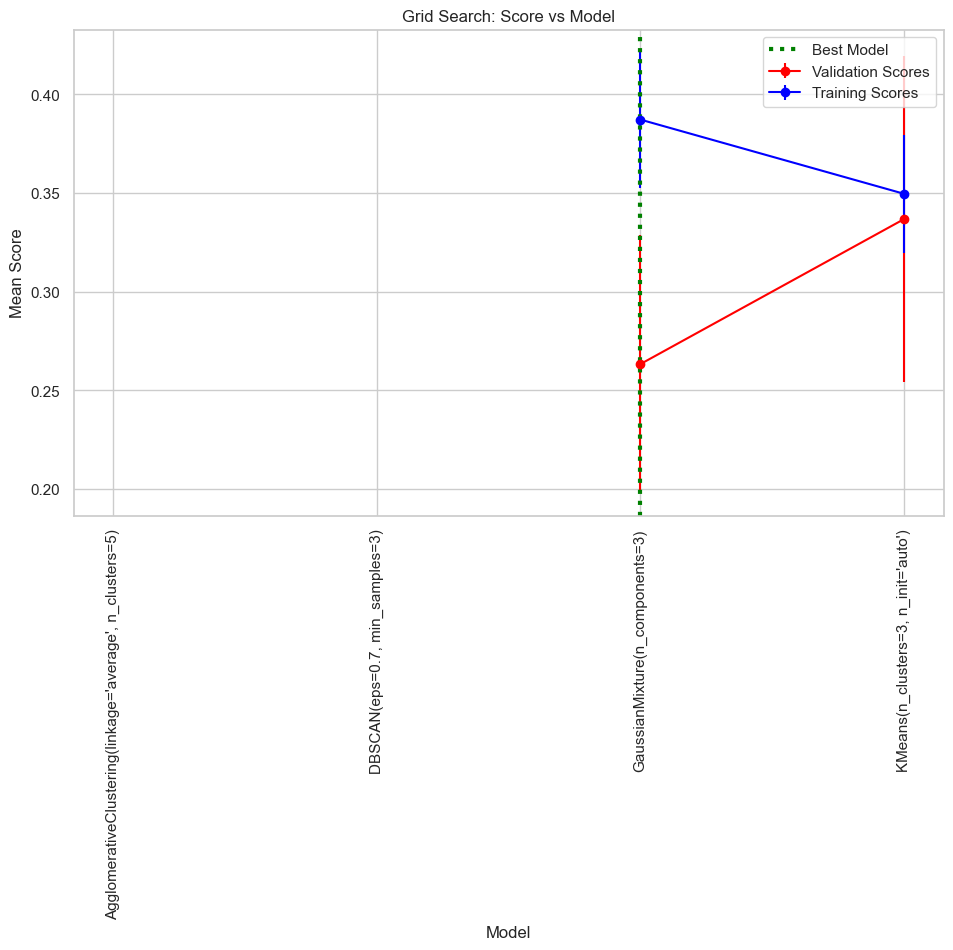

In [32]:
# Call the function with your actual data
plot_average_score_of_hyperparameters(grid_outcomes, first_hyperparameter, second_hyperparameter=second_hyperparameter)


#### <a id='toc3_4_1_2_'></a>[**Performace Evaluation of Best Model**](#toc0_)

,1,2,3
param_model,GaussianMixture(n_components=3),"KMeans(n_clusters=3, n_init='auto')","KMeans(n_clusters=3, n_init='auto')"
param_scaler,StandardScaler(),StandardScaler(),StandardScaler()
score_method,mutual_info_score,mutual_info_score,mutual_info_score
train_score_average,0.404282,0.367249,0.331987
validation_score_average,0.427261,0.338657,0.334845
n_splits,5,5,5
mean_fit_time,0.025609,0.004801,0.008603
mean_score_time,0.003001,0.003001,0.003801


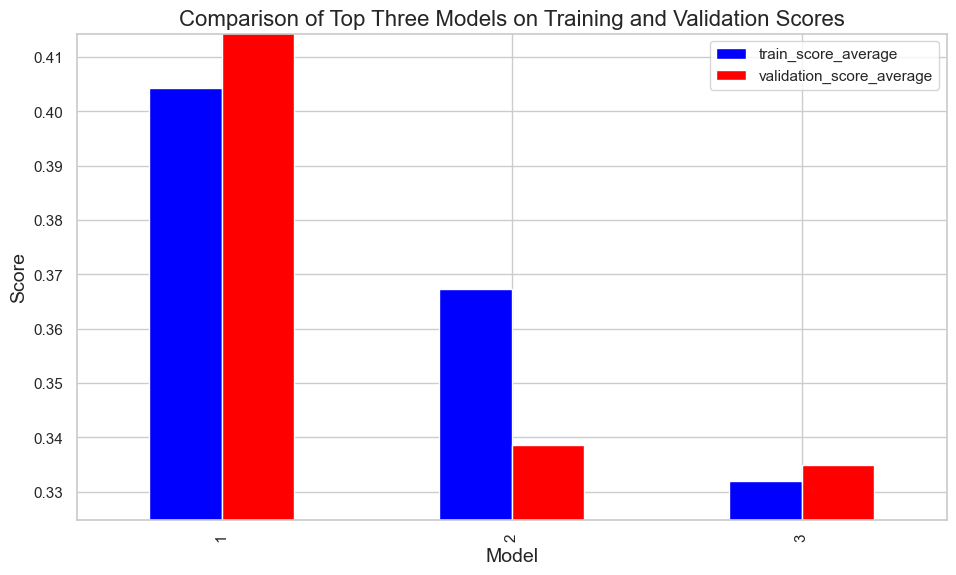

In [33]:
top_3_model_results(grid_outcomes, grid, show_bars=True).T


In [34]:

# Using the function
if regression:
    evaluate_regression_model(best_model, X_test, y_test, plot=True)

if classification:
    evaluate_classifier_model(best_model, X_test, y_test, confusion_matrix=True)

print('Best Model\'s Refit Time', round(grid.refit_time_, 3),
'\nTotal Search Time', round(time_taken, 3))


Best Model's Refit Time 0.029 
Total Search Time 0.129


#### <a id='toc3_4_1_3_'></a>[**Compute Efficiency and Runtime**](#toc0_)

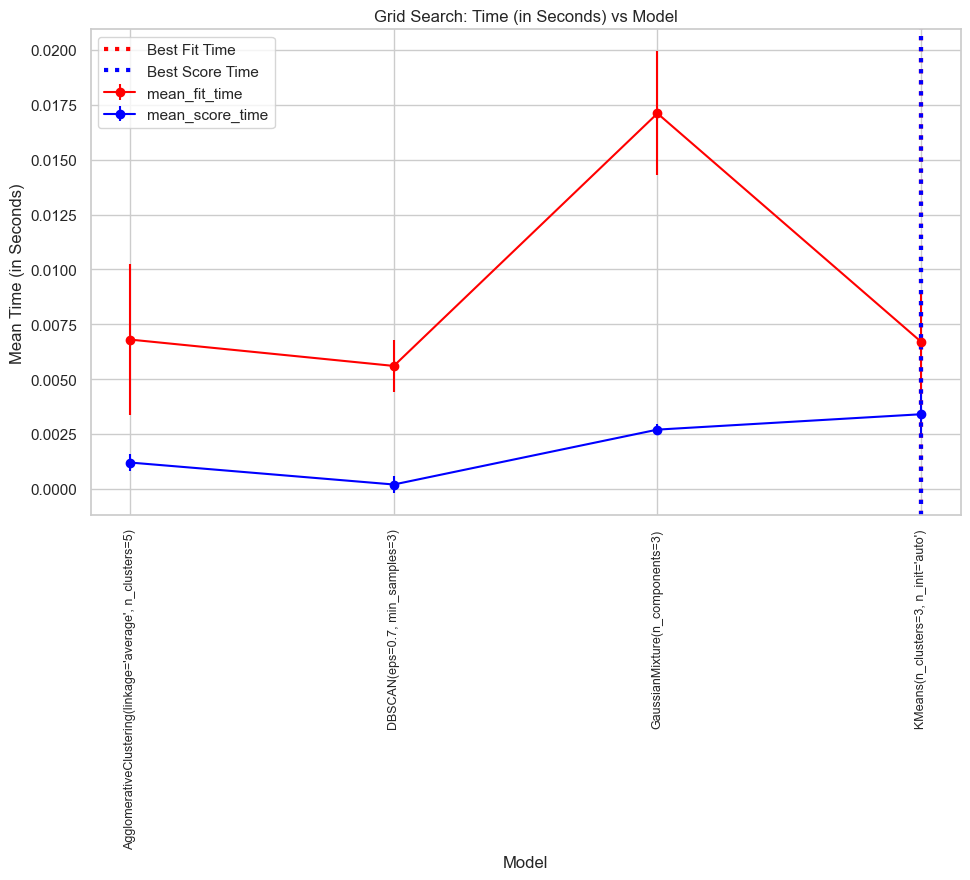

In [35]:

plot_average_time_of_hyperparameters(grid_outcomes, first_hyperparameter, second_hyperparameter=second_hyperparameter)



#### <a id='toc3_4_1_4_'></a>[**Residual Evaluation of Best Model**](#toc0_)

Independence and Identically Distributed, Normality, and Homoscedasticity

In [36]:
if regression:
    plot_regression_residuals(best_model, X_test, y_test)

if classification:
    plot_classifier_residuals(best_model, X_test, y_test, True)

These two visual tests show that the distribution of the residuals is normally distributed and appears to be independent of the fitted values. Furthermore, the Durbin-Watson of the residuals is close to 2, which indicates that there is very little to no autocorrelation in the residuals. Therefore we can conclude that the residuals are not correlated with each other and the distribution of the residuals is not dependent on the predicted probability of the target class. This means that this model meets the assumption of independence and identically distributed. 



## <a id='toc3_5_'></a>[Final Model Tuning](#toc0_)

### <a id='toc3_5_1_'></a>[Final Model Hyperparameter Tuning](#toc0_)

In [37]:
if regression:
        param_grid_catboost = {'scaler': [StandardScaler()],
                'model': [CatBoostRegressor()],
                'model__learning_rate': np.logspace(-2, -1, 10),
                'model__iterations': [1000],
                'model__depth': [5, 6, 7]}

        param_grid = param_grid_catboost

In [38]:
# classification_metrics = ['accuracy', 'roc_auc', 'f1', 'precision', 'recall']
if classification:
    scoring_metric = 'accuracy'


# regression_metrics = ['r2', 'explained_variance', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']
if regression:
    scoring_metric = 'r2'
    

# clustering_metrics = ['adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score']
if clustering:
    scoring_metric = 'adjusted_rand_score'


In [39]:
# Capture the current time to measure the time taken by the grid search
start_time = time.time()

# Define a GridSearchCV object with the pipeline, parameter grid, and desired settings
grid = HalvingGridSearchCV(pipe, param_grid, return_train_score=True, 
                    cv=3, refit=True, verbose=0, n_jobs=-1, scoring=scoring_metric)


if clustering:
    # Fit the GridSearchCV object to the data - only X_train is required for clustering
    grid.fit(X_train, y_train)
else:
    # Fit the GridSearchCV object to the data - X_train and y_train are required for classification and regression
    grid.fit(X_train, y_train)
    

# Calculate the total time taken for the grid search by subtracting the start time from the end time
end_time = time.time()
time_taken = end_time - start_time


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.46764329        nan        nan 0.        ]
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the train scores are non-finite: [0.50384007        nan        nan 0.46806052]
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.46764329        nan        nan 0.         0.66141765 0.5174949 ]
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the train scores are non-finite: [0.50384007        nan        nan 0.46806052 0.59259455 0.51694688]
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on 

In [40]:
# Create a DataFrame with the results of the grid search
grid_outcomes = pd.DataFrame(grid.cv_results_).apply(lambda x: x.astype(str).replace('_|().<>', ' ') if x.dtype == 'object' else x)

# Get the best grid search's best predicted probabilities
best_model = grid.best_estimator_


## <a id='toc3_6_'></a>[Final Model Tuning: Evaluation of Hyperparameters](#toc0_)



Here I visualize the impact of shifting the hyperparameters on the accuracy of the model. I also visualize the confusion matrix and printed out the classification report.

In [41]:
print(grid_outcomes.columns)

# first_hyperparameter = 'param_model__depth'
# second_hyperparameter = 'param_model__learning_rate'

grid_outcomes.groupby(first_hyperparameter)

Index(['iter', 'n_resources', 'mean_fit_time', 'std_fit_time',
       'mean_score_time', 'std_score_time', 'param_model', 'param_scaler',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


#### <a id='toc3_6_1_1_'></a>[**Performace Evaluation of All Hyperparameters**](#toc0_)

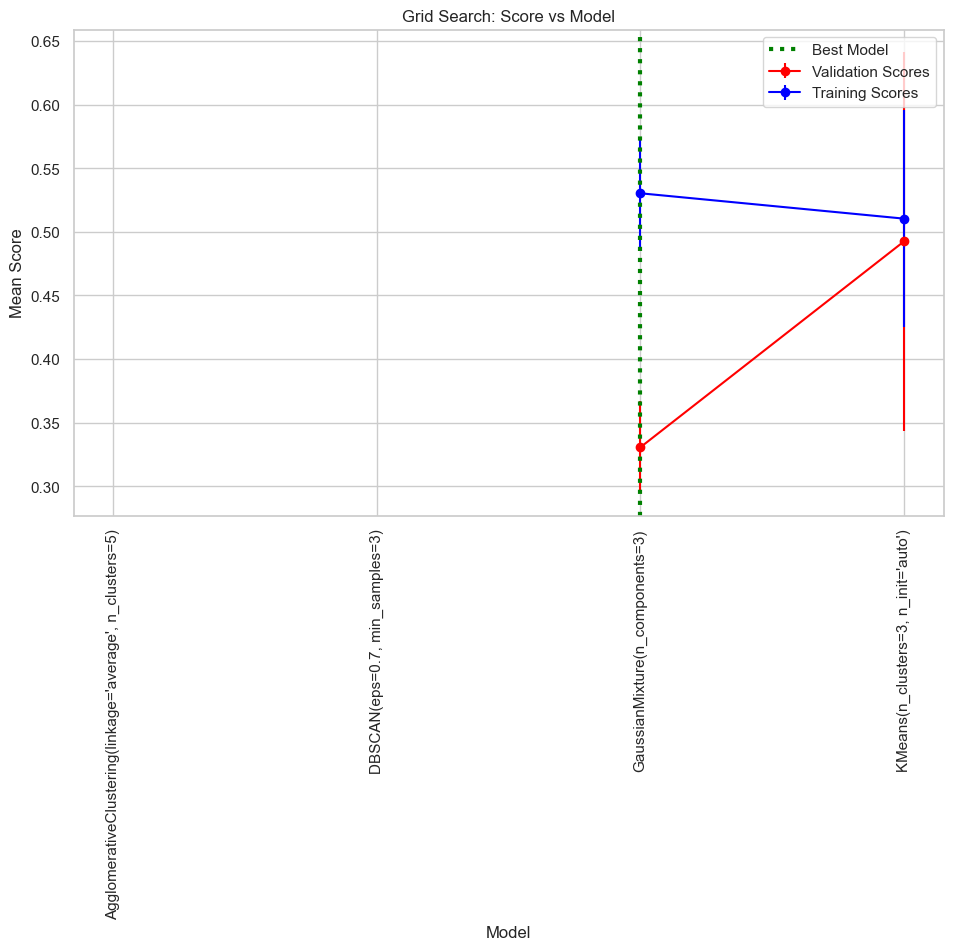

In [42]:
# Call the function with your actual data
plot_average_score_of_hyperparameters(grid_outcomes, first_hyperparameter, 
                second_hyperparameter=second_hyperparameter)


#### <a id='toc3_6_1_2_'></a>[**Compute Efficiency and Runtime**](#toc0_)

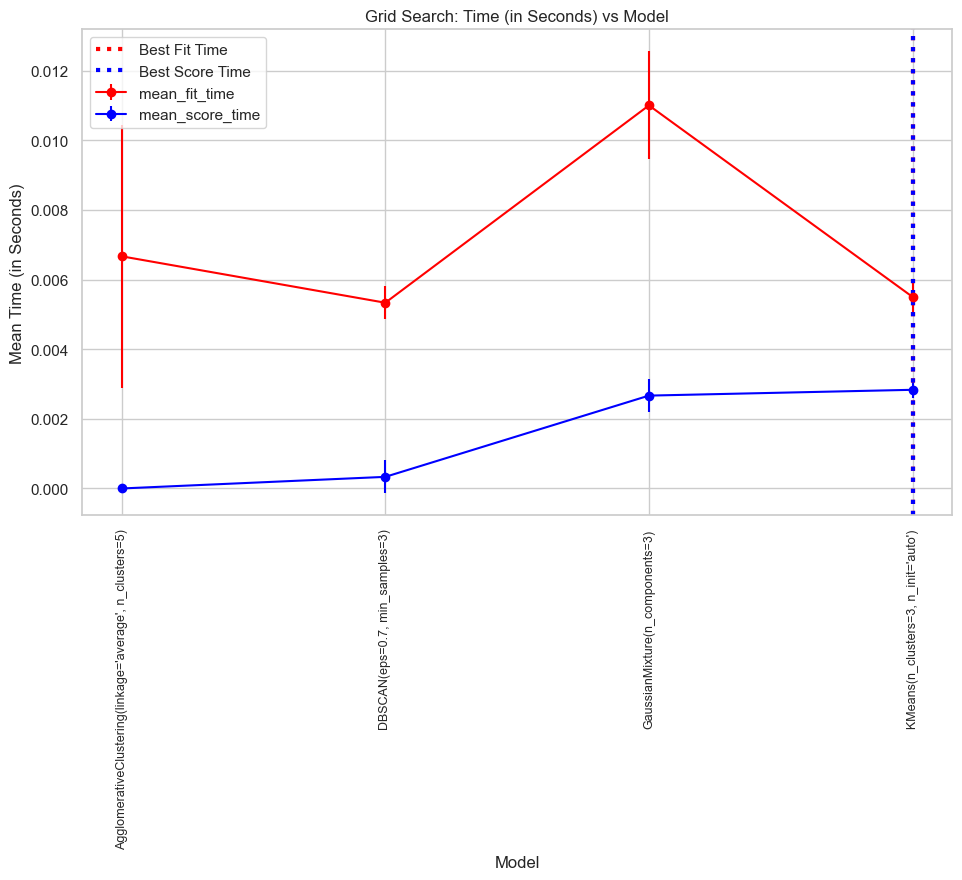

In [43]:

plot_average_time_of_hyperparameters(grid_outcomes, first_hyperparameter, second_hyperparameter=second_hyperparameter)



#### <a id='toc3_6_1_3_'></a>[**Performace Evaluation of Best Hyperparameters**](#toc0_)

,1,2,3
param_model,GaussianMixture(n_components=3),"KMeans(n_clusters=3, n_init='auto')","KMeans(n_clusters=3, n_init='auto')"
param_scaler,StandardScaler(),StandardScaler(),StandardScaler()
score_method,adjusted_rand_score,adjusted_rand_score,adjusted_rand_score
train_score_average,0.592595,0.516947,0.50384
validation_score_average,0.661418,0.517495,0.467643
n_splits,3,3,3
mean_fit_time,0.014672,0.005335,0.005668
mean_score_time,0.002668,0.002668,0.003001


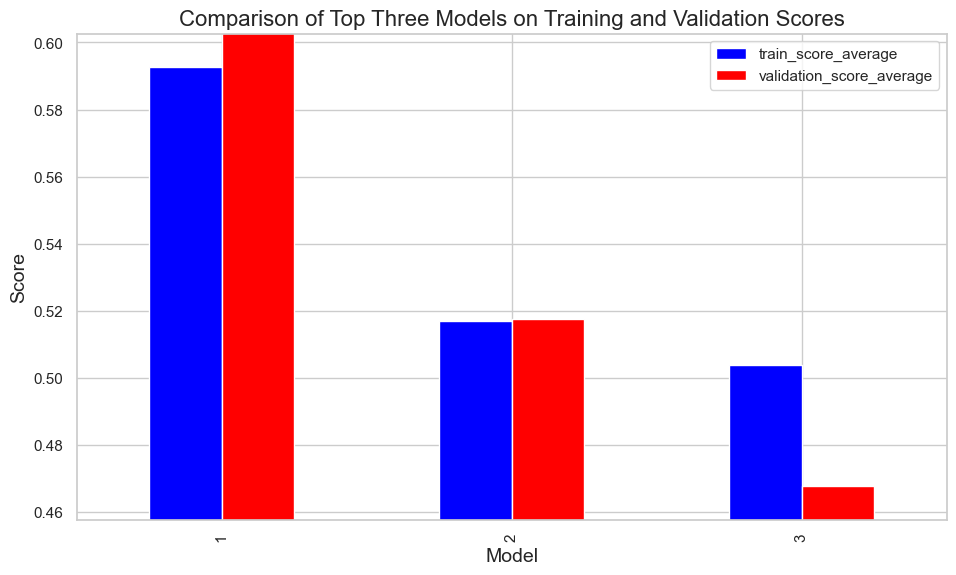

In [44]:
top_3_model_results(grid_outcomes, grid, show_bars=True).T

In [45]:
# Using the function
if regression:
    evaluate_regression_model(best_model, X_test, y_test, plot=True)

if classification:
    evaluate_classifier_model(best_model, X_test, y_test, confusion_matrix=True)

print('Best Model\'s Refit Time', round(grid.refit_time_, 3),
'\nTotal Search Time', round(time_taken, 3))


Best Model's Refit Time 0.033 
Total Search Time 0.1


#### <a id='toc3_6_1_4_'></a>[**Residual Evaluation of Best Hyperparameters**](#toc0_)

Independence and Identically Distributed, Normality, and Homoscedasticity

In [46]:
if regression:
    plot_regression_residuals(best_model, X_test, y_test)

if classification:
    plot_classifier_residuals(best_model, X_test, y_test, True)

# <a id='toc4_'></a>[Key Findings](#toc0_)

Summarize the findings from the analyses.



# <a id='toc5_'></a>[Recommendations](#toc0_)

List number of actionables based on the findings.

### <a id='toc5_1_1_'></a>[Reference for other parameter grids](#toc0_)

In [47]:
# Parameter grid for LinearRegression
param_grid_linreg = {'scaler': [StandardScaler()],
    'model': [LinearRegression()],
    # Linear Regression does not really have any hyperparameters
}

# Parameter grid for SGDRegressor
param_grid_sgdreg = {'scaler': [StandardScaler()],
    'model': [SGDRegressor()],
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

# Parameter grid for ElasticNet
param_grid_elasticnet = {'scaler': [StandardScaler()],
    'model': [ElasticNet()],
    'model__alpha': np.logspace(-4, 4, 20),
    'model__l1_ratio': np.linspace(0, 1, 10)
}

# Parameter grid for DecisionTreeRegressor
param_grid_dtr = {'scaler': [StandardScaler()],
    'model': [DecisionTreeRegressor()],
    'model__criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
    'model__max_depth': [None, 5, 10, 15, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4, 6]
}

# Parameter grid for SVR
param_grid_svr = {'scaler': [StandardScaler()],
    'model': [SVR()],
    'model__C': [0.1, 1, 10, 100],
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'model__gamma': ['scale', 'auto']
}

# Parameter grid for KNeighborsRegressor
param_grid_knr = {'scaler': [StandardScaler()],
    'model': [KNeighborsRegressor()],
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Combine all parameter grids into a list
basic_regression_param_grids = [param_grid_linreg, param_grid_sgdreg, param_grid_elasticnet, param_grid_dtr, param_grid_knr] # param_grid_svr, 


In [48]:
# Parameter grid for LogisticRegression
param_grid_logreg = {'scaler': [StandardScaler()],
    'model': [LogisticRegression()],
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__C': np.logspace(-4, 4, 10)
}

# Parameter grid for SGDClassifier
param_grid_sgd = {'scaler': [StandardScaler()],
    'model': [SGDClassifier()],
    'model__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    'model__alpha': np.logspace(-4, 4, 10)
}

# Parameter grid for DecisionTreeClassifier
param_grid_dtc = {'scaler': [StandardScaler()],
    'model': [DecisionTreeClassifier()],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 5, 10, 15, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4, 6]
}

# Parameter grid for SVC
param_grid_svc = {'scaler': [StandardScaler()],
    'model': [SVC()],
    'model__C': np.logspace(-2, 2, 5),
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'model__gamma': ['scale', 'auto']
}

# Parameter grid for KNeighborsClassifier
param_grid_knc = {'scaler': [StandardScaler()],
    'model': [KNeighborsClassifier()],
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Combine all parameter grids into a list
basic_classifier_param_grids = [param_grid_logreg, param_grid_sgd, param_grid_dtc, param_grid_svc, param_grid_knc]


In [49]:
# Parameter grid for KMeans
param_grid_kmeans = {'scaler': [StandardScaler()],
    'model': [KMeans()],
    'model__n_clusters': range(2, 11, 2),
    'model__init': ['k-means++', 'random'],
    'model__n_init': [10, 20]
}

# Parameter grid for AgglomerativeClustering
param_grid_aggc = {'scaler': [StandardScaler()],
    'model': [AgglomerativeClustering()],
    'model__n_clusters': range(2, 11, 2),
    'model__linkage': ['ward', 'complete', 'average', 'single']
}

# Parameter grid for DBSCAN
param_grid_dbscan = {'scaler': [StandardScaler()],
    'model': [DBSCAN()],
    'model__eps': [0.3, 0.5, 0.7],
    'model__min_samples': [4, 10, 18]
}

# Parameter grid for GaussianMixture
param_grid_gmm = {'scaler': [StandardScaler()],
    'model': [GaussianMixture()],
    'model__init_params': ['kmeans++', 'random'],
    'model__n_components': range(2, 11, 2),
    'model__covariance_type': ['full', 'tied', 'diag', 'spherical']
}

# Combine all parameter grids into a list
clustering_param_grids = [param_grid_kmeans, param_grid_aggc, param_grid_dbscan, param_grid_gmm]


In [50]:
# Parameter grid for RandomForestClassifier
param_grid_rfc = {'scaler': [StandardScaler()],
    'model': [RandomForestClassifier()],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': range(2, 11, 2),
    'model__min_samples_leaf': [1, 2, 4, 8]
}

# Parameter grid for ExtraTreesClassifier
param_grid_etc = {'scaler': [StandardScaler()],
    'model': [ExtraTreesClassifier()],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': range(2, 11, 2),
    'model__min_samples_leaf': [1, 2, 4, 8]
}

# Parameter grid for LGBMClassifier
param_grid_lgbmc = {'scaler': [StandardScaler()],
    'model': [LGBMClassifier()],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [50, 100, 200],
    'model__num_leaves': [31, 60, 90],
    'model__max_depth': [None, 5, 10, 15]
}

# Parameter grid for CatBoostClassifier
param_grid_catboostc = {'scaler': [StandardScaler()],
    'model': [CatBoostClassifier()],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__iterations': [500, 1000],
    'model__depth': [5, 7, 10]
}

# Parameter grid for GaussianNB
param_grid_gnb = {
    'model': [GaussianNB()]  # no hyperparameters to tune
}

# Combine all parameter grids into a list
advanced_classifier_param_grids = [param_grid_rfc, param_grid_etc, param_grid_lgbmc, param_grid_catboostc, param_grid_gnb]


In [51]:
# Parameter grid for RandomForestRegressor
param_grid_rfr = {'scaler': [StandardScaler()],
    'model': [RandomForestRegressor()],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Parameter grid for ExtraTreesRegressor
param_grid_etr = {'scaler': [StandardScaler()],
    'model': [ExtraTreesRegressor()],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Parameter grid for LGBMRegressor
param_grid_lgbm = {'scaler': [StandardScaler()],
    'model': [LGBMRegressor()],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [50, 100, 200],
    'model__num_leaves': [31, 60, 90],
    'model__max_depth': [None, 5, 10, 15]
}

# Parameter grid for CatBoostRegressor
param_grid_catboost = {'scaler': [StandardScaler()],
    'model': [CatBoostRegressor()],
    'model__learning_rate': np.logspace(-2, 2, 5),
    'model__iterations': [500, 1000],
    'model__depth': [4, 7, 10]
}

# Parameter grid for GradientBoostingRegressor
param_grid_gbr = {'scaler': [StandardScaler()],
    'model': [GradientBoostingRegressor()],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [50, 100, 200],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__max_depth': [None, 3, 5, 7]
}

# Combine all parameter grids into a list
advanced_regression_param_grids = [param_grid_rfr, param_grid_etr, param_grid_lgbm, param_grid_catboost, param_grid_gbr]


In [52]:

# Classifier parameter grids
basic_classifier_param_grids
advanced_classifier_param_grids

# Regressor parameter grids
basic_regression_param_grids
advanced_regression_param_grids

# Clustering parameter grids
clustering_param_grids

[{'scaler': [StandardScaler()],
  'model': [KMeans()],
  'model__n_clusters': range(2, 11, 2),
  'model__init': ['k-means++', 'random'],
  'model__n_init': [10, 20]},
 {'scaler': [StandardScaler()],
  'model': [AgglomerativeClustering()],
  'model__n_clusters': range(2, 11, 2),
  'model__linkage': ['ward', 'complete', 'average', 'single']},
 {'scaler': [StandardScaler()],
  'model': [DBSCAN()],
  'model__eps': [0.3, 0.5, 0.7],
  'model__min_samples': [4, 10, 18]},
 {'scaler': [StandardScaler()],
  'model': [GaussianMixture()],
  'model__init_params': ['kmeans++', 'random'],
  'model__n_components': range(2, 11, 2),
  'model__covariance_type': ['full', 'tied', 'diag', 'spherical']}]

In [53]:
# Suppose the list of parameter grids is as follows
param_grids = basic_regression_param_grids

# Empty DataFrame to store the results
results_df = []

# Iterate over each parameter grid in the list
for i, param_grid in enumerate(param_grids):
    
    # Capture the current time to measure the time taken by the grid search
    start_time = time.time()
    
    # Define a HalvingRandomSearchCV object with the pipeline, parameter grid, and desired settings
    grid = HalvingRandomSearchCV(pipe, param_grid, return_train_score=True, 
                        cv=3, refit=True, verbose=1, n_jobs=-1, scoring='r2')

    # Fit the GridSearchCV object to the data - this will perform the actual grid search
    grid.fit(X_train, y_train)
    
    # Calculate the total time taken for the grid search by subtracting the start time from the end time
    end_time = time.time()
    time_taken = end_time - start_time
    
    # Retrieve the best parameters, best training score, best test score, and mean fit time
    best_params = grid.best_params_
    train_score = grid.cv_results_['mean_train_score'][grid.best_index_]
    test_score = grid.cv_results_['mean_test_score'][grid.best_index_]
    mean_fit_time = grid.cv_results_['mean_fit_time'][grid.best_index_]
    
    # Append the results to the DataFrame
    results_df.append({
        'params': best_params, 
        'train_score': round(train_score, 3), 
        'test_score': round(test_score, 3), 
        'mean_fit_time': mean_fit_time,
        'search_time': time_taken
    })
    
    print("Total Time Taken:", time_taken)


NameError: name 'HalvingRandomSearchCV' is not defined

In [ ]:

# Display the resulting DataFrame
pd.DataFrame(results_df).sort_values(by='test_score', ascending=False)
